# Proyecto final 
## Joaquín Antonio Ramírez Hernández

Ejercicio 1

Aquí, se mandan a llamar los paquetes que vamos a utilizar en el programa.

In [31]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

En esta sección, se cargan los datos del archivo 'problema1.csv'. Se observa que, se tienen cuatro columnas, las primeras dos corresponden a los datos de entrenamiento y las últimas dos corresponden a los datos de testing.

In [32]:
df = pd.read_csv('problem1.csv')
df.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


En esta sección queremos observar la 'calidad' de datos que se tienen. Se observa que, hay 134 datos de entrenamiento no nulos, mientras que solo hay 21 datos de testing no nulos.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
X_training    134 non-null float64
Y_training    134 non-null float64
X_test        21 non-null float64
Y_test        21 non-null float64
dtypes: float64(4)
memory usage: 4.3 KB


Dado que se quiere encontrar el polinomio que mejor se ajuste a los datos de entrenamiento, se va a transformar el data frame anterior a un arreglo de (134,4), con la intensión de solo utilizar la libreria de numpy por comodidad. 

In [34]:
dfnp=df.to_numpy()
dfnp.shape

(134, 4)

a) fase de entrenamiento:

Se grafican los datos de entrenamiento con la intensión de saber (aunque cualitativamente) cual es el grado máximo y mínimo que debe tener el polinomio a ajustar. Se concluye que, por la cantidad de ceros y oscilaciones al menos éste debe de ser de grado mayor que 4 y menor que 10.

<function matplotlib.pyplot.show(*args, **kw)>

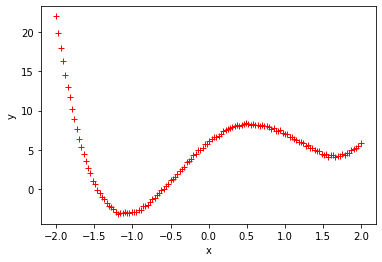

In [35]:
plt.plot(dfnp[:,0],dfnp[:,1], 'r+')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Con esto en mente, se van a ajustar los polinomios que van desde el grado 1 hasta el 18 y se van a calcular el RSSv y AICv dados por las siguientes ecuaciones:
$$\begin{array}{c}
RSSv=\frac{1}{2}\sum_{i=1}^{n}(pol(x_{i})-y_{i})^{2}\\
AICv=n\log(\frac{RSS}{n})+\frac{2mn}{n-m-1}
\end{array}$$

donde $n$ es el número de datos y $m$ es la cantidad de coeficientes que tiene el polinomio ajustado $pol(x)$

In [36]:
RSSv = np.zeros(18)
AICv = np.zeros(18)

In [37]:
for i in range(18):
    coef = poly.polyfit(dfnp[:,0], dfnp[:,1], i+1)
    model =  poly.Polynomial(coef)
    RSSv[i]=0.5*np.sum((dfnp[:,1]-model(dfnp[:,0]))**2)
    AICv[i]=len(dfnp[:,0])*math.log10(RSSv[i]/len(dfnp[:,0]))+ ((2*len(coef)*len(dfnp[:,0]))/(len(dfnp[:,0])-len(coef)-1))

Se van a graficar el RSSv y AICv vs el grado del polinomio. Como se observa en las gráficas, aunque el RSSv siempre es decreciente como función del grado del polinomio, el AICv solo tiene un mínimo en 4, por lo cual, la complejidad y error adecuados del polinomio se obtienen en el polinomio de grado 4.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


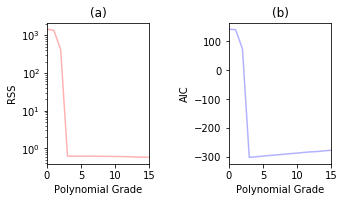

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,18,1), RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, 15))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,18,1), AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, 15))
ax2.set_title('(b)')
plt.show()

In [39]:
grado = np.argmin(AICv)+1
grado

4

De la fase entrenamiento, se obtiene que el mejor polinomio que se ajusta a los datos viene dado por el modelo siguiente

In [40]:
coef = poly.polyfit(dfnp[:,0], dfnp[:,1], grado)
model = poly.Polynomial(coef)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

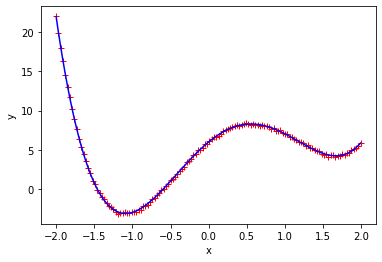

In [41]:
plt.plot(dfnp[:,0],dfnp[:,1], 'r+')
plt.plot(dfnp[:,0],model(dfnp[:,0]),'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b) fase de testing

En este caso, se gráfica el modelo obtenido de la fase entrenamiento y los datos de la fase de testing, como se observa, se empalman muy bien los datos con la gráfica del polinomio.

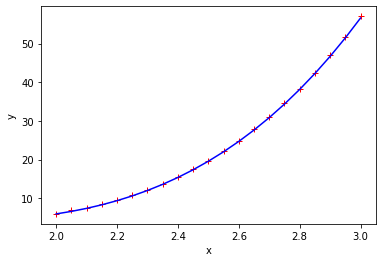

In [42]:
plt.plot(dfnp[:,2],dfnp[:,3], 'r+')
plt.plot(dfnp[:,2],model(dfnp[:,2]),'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Además, el error RSSv es muy pequeño por darnos el valor de nan, que dado el equipo que se utiliza corresponde a un underflow. 

In [44]:
RSSv=0.5*np.sum((dfnp[:,3]-model(dfnp[:,2]))**2)
RSSv

nan